In [42]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error 

In [43]:
Airlines = pd.read_csv("Airlines_data.csv")
Airlines

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot:>

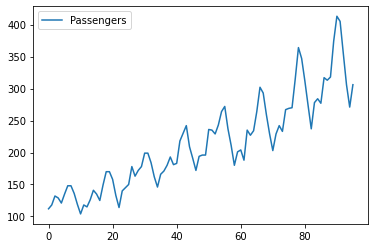

In [44]:
Airlines.plot() 

In [45]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month=pd.DataFrame(month)
months=pd.DataFrame(np.tile(month,(8,1)))
Airlines=pd.concat([Airlines,months],axis=1)
Airlines.columns=['Month','Passengers','months']

In [46]:
month_dummies=pd.get_dummies(Airlines['months'])
Airlines=pd.concat([Airlines,month_dummies],axis=1)
Airlines['t']=np.arange(1,97)
Airlines['t_sq']=Airlines['t']*Airlines['t']
Airlines['log_passengers']=np.log(Airlines['Passengers'])

In [47]:
Airlines.head(5)

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [48]:
Airlines.describe()

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_passengers
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,213.708333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,48.500000,3120.166667,5.309322
std,71.918216,0.277836,0.277836,0.277836,0.277836,0.277836,0.277836,0.277836,0.277836,0.277836,0.277836,0.277836,0.277836,27.856777,2788.897895,0.335338
min,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.644391
25%,156.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.750000,612.750000,5.049605
50%,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.500000,2352.500000,5.298305
75%,264.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,5220.250000,5.578774
max,413.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,9216.000000,6.023448


<AxesSubplot:>

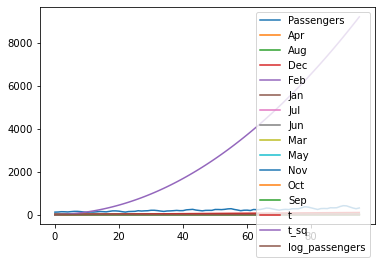

In [49]:
Airlines.plot()

In [50]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           96 non-null     object 
 1   Passengers      96 non-null     int64  
 2   months          96 non-null     object 
 3   Apr             96 non-null     uint8  
 4   Aug             96 non-null     uint8  
 5   Dec             96 non-null     uint8  
 6   Feb             96 non-null     uint8  
 7   Jan             96 non-null     uint8  
 8   Jul             96 non-null     uint8  
 9   Jun             96 non-null     uint8  
 10  Mar             96 non-null     uint8  
 11  May             96 non-null     uint8  
 12  Nov             96 non-null     uint8  
 13  Oct             96 non-null     uint8  
 14  Sep             96 non-null     uint8  
 15  t               96 non-null     int32  
 16  t_sq            96 non-null     int32  
 17  log_passengers  96 non-null     float

In [51]:
Airlines.months.value_counts()

Jan    8
Feb    8
Mar    8
Apr    8
May    8
Jun    8
Jul    8
Aug    8
Sep    8
Oct    8
Nov    8
Dec    8
Name: months, dtype: int64

<AxesSubplot:xlabel='months', ylabel='count'>

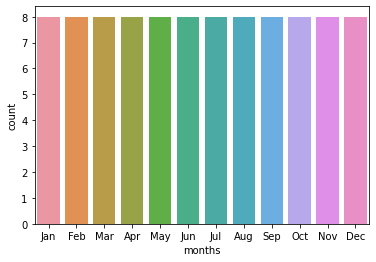

In [52]:
sns.countplot(x="months",data=Airlines)

<AxesSubplot:xlabel='months', ylabel='Passengers'>

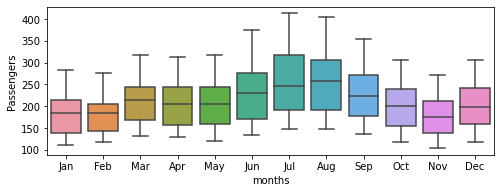

In [53]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="months",y="Passengers",data=Airlines)

<AxesSubplot:xlabel='months', ylabel='Passengers'>

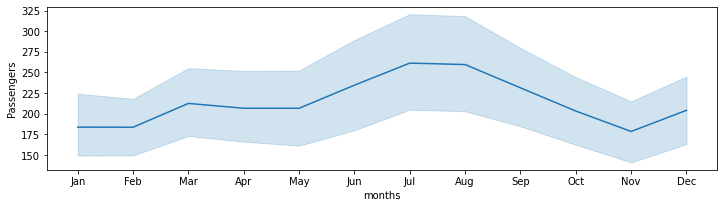

In [54]:
plt.figure(figsize=(12,3))
sns.lineplot(x="months",y="Passengers",data=Airlines) 

In [55]:
Airlines.columns

Index(['Month', 'Passengers', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_sq',
       'log_passengers'],
      dtype='object')

In [56]:
Airlines.corr()

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_passengers
Passengers,1.000000,-0.030379,0.192986,-0.040915,-0.127311,-0.126784,0.200361,0.087625,-0.005619,-0.030379,-0.148910,-0.044603,0.073928,0.904327,0.902284,0.983507
Apr,-0.030379,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.027201,-0.026970,-0.021669
Aug,0.192986,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,0.016321,0.014762,0.178494
Dec,-0.040915,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,0.059842,0.059973,-0.033235
Feb,-0.127311,-0.090909,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.048962,-0.046533,-0.121387
Jan,-0.126784,-0.090909,-0.090909,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.059842,-0.055988,-0.130899
Jul,0.200361,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,0.005440,0.004003,0.180407
Jun,0.087625,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.005440,-0.006539,0.084370
Mar,-0.005619,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.038082,-0.036860,0.008025
May,-0.030379,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,1.000000,-0.090909,-0.090909,-0.090909,-0.016321,-0.016863,-0.027564


<AxesSubplot:>

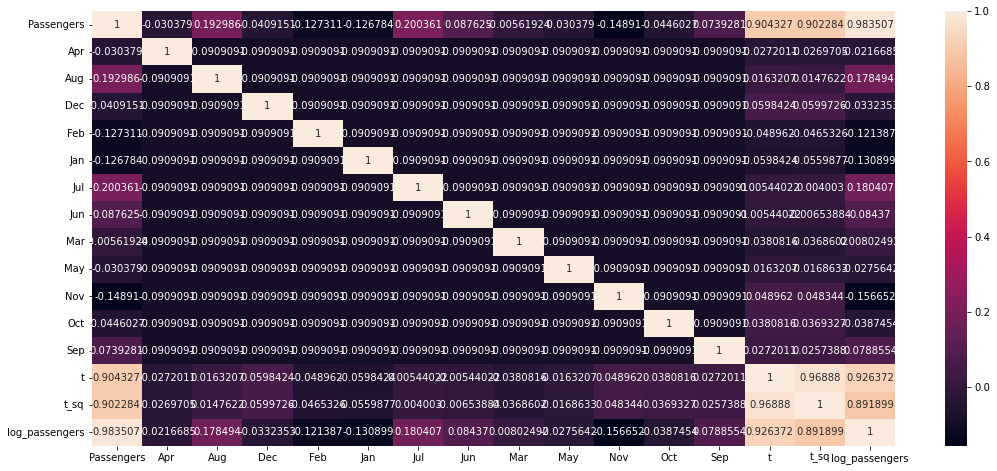

In [57]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(Airlines.corr(),annot=True,fmt="g") #fmt is format of the grid values

# Model Building

In [58]:
Train = Airlines.head(80)
Test = Airlines.tail(16)  

In [59]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2)) 
rmse_linear

47.542624067726734

In [60]:
#Exponential

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

43.79373939334317

In [61]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584248

In [62]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea 

129.266476414433

In [63]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

23.910983570108197

In [64]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

135.32648414621053

In [65]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.469000230375698

In [66]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


# ARIMA MODEL

In [67]:
data=pd.read_csv("Airlines_data.csv",header=0,index_col=0)
data

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


In [68]:
#Separate out the validation dataset
split_point=len(data)-16
df_Airlines, Validation_Cocacola=data[0:split_point],data[split_point:]
print("df_Airlines %d,  Validation_Cocacola %d" % (len(df_Airlines),len( Validation_Cocacola)))

df_Airlines 80,  Validation_Cocacola 16


In [69]:
df_Airlines.to_csv("df_Airlines.csv",header=False)
Validation_Cocacola.to_csv("Validation_Cocacola.csv",header=False)

In [70]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
train=read_csv("df_Airlines.csv",header=None,index_col=0,parse_dates=True,squeeze=True)
train

0
Jan-95    112
Feb-95    118
Mar-95    132
Apr-95    129
May-95    121
         ... 
Apr-01    269
May-01    270
Jun-01    315
Jul-01    364
Aug-01    347
Name: 1, Length: 80, dtype: int64

In [71]:
X=train.values
train_size=int(len(X)*0.50)
train, test=X[0:train_size],X[train_size:]

In [72]:
train, test

(array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
        178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
        181], dtype=int64),
 array([183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229,
        243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234, 264,
        302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315, 364,
        347], dtype=int64))

# VALIDATION

In [73]:
history=[x for x in train]
predictions=list()
for i in range (len(test)):
    yhat=history[-1]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print(">predicted=%.3f, expected=%.3f" % (yhat,obs))

>predicted=181.000, expected=183.000
>predicted=183.000, expected=218.000
>predicted=218.000, expected=230.000
>predicted=230.000, expected=242.000
>predicted=242.000, expected=209.000
>predicted=209.000, expected=191.000
>predicted=191.000, expected=172.000
>predicted=172.000, expected=194.000
>predicted=194.000, expected=196.000
>predicted=196.000, expected=196.000
>predicted=196.000, expected=236.000
>predicted=236.000, expected=235.000
>predicted=235.000, expected=229.000
>predicted=229.000, expected=243.000
>predicted=243.000, expected=264.000
>predicted=264.000, expected=272.000
>predicted=272.000, expected=237.000
>predicted=237.000, expected=211.000
>predicted=211.000, expected=180.000
>predicted=180.000, expected=201.000
>predicted=201.000, expected=204.000
>predicted=204.000, expected=188.000
>predicted=188.000, expected=235.000
>predicted=235.000, expected=227.000
>predicted=227.000, expected=234.000
>predicted=234.000, expected=264.000
>predicted=264.000, expected=302.000
>

In [74]:
rmse_arima=sqrt(mean_squared_error(test,predictions))
#print("RMSE: %.3F" % rmse)
rmse_arima

24.47754072614322

In [75]:

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","RMSE_ARIMA"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_arima])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
7,RMSE_ARIMA,24.477541
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


In [76]:
##Multiplicative Additive Seasonality has low rmse value, So it is considered as most preferred value